In [48]:
# 1. Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Configuración de Visualización
# Para que los gráficos se muestren en el notebook
%matplotlib inline
# Estilo de los gráficos
sns.set_style('whitegrid')
plt.style.use('ggplot')

# 3. Carga de Datos
# La ruta es relativa a la ubicación del notebook.
# '../' significa 'subir un nivel de carpeta' (de 'notebooks' a la raíz del proyecto).
file_path = '../data/listings.csv.gz'
df = pd.read_csv(file_path, compression='gzip')

# 4. Inspección Inicial Rápida
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")
df.head()

El dataset tiene 26004 filas y 79 columnas.


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,21853,https://www.airbnb.com/rooms/21853,20250612050748,2025-06-26,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.25
1,30320,https://www.airbnb.com/rooms/30320,20250612050748,2025-06-27,previous scrape,Apartamentos Dana Sol,NaN,NaN,https://a0.muscache.com/pictures/336868/f67409...,130907,...,4.78,4.90,4.69,NaN,f,3,3,0,0,0.94
2,30959,https://www.airbnb.com/rooms/30959,20250612050748,2025-06-27,previous scrape,Beautiful loft in Madrid Center,Beautiful Loft 60m2 size just in the historica...,NaN,https://a0.muscache.com/pictures/78173471/835e...,132883,...,4.63,4.88,4.25,NaN,f,1,1,0,0,0.06
3,40916,https://www.airbnb.com/rooms/40916,20250612050748,2025-06-26,previous scrape,Apartasol Apartamentos Dana,NaN,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,130907,...,4.79,4.88,4.55,NaN,t,3,3,0,0,0.27
4,62423,https://www.airbnb.com/rooms/62423,20250612050748,2025-06-25,city scrape,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,DISTRICT WITH VERY GOOD VIBES IN THE MIDDLE OF...,https://a0.muscache.com/pictures/miso/Hosting-...,303845,...,4.86,4.97,4.59,NaN,f,3,1,2,0,2.70


## 1. Vistazo General y Limpieza de Datos

En esta sección, realizaremos una primera inspección del dataset para entender su estructura, identificar columnas irrelevantes, manejar valores nulos y corregir los tipos de datos. El objetivo es tener un DataFrame limpio y listo para el análisis exploratorio.

In [49]:
# Ver un resumen de todas las columnas, sus tipos de datos y los valores no nulos.
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26004 entries, 0 to 26003
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26004 non-null  int64  
 1   listing_url                                   26004 non-null  object 
 2   scrape_id                                     26004 non-null  int64  
 3   last_scraped                                  26004 non-null  object 
 4   source                                        26004 non-null  object 
 5   name                                          26004 non-null  object 
 6   description                                   25104 non-null  object 
 7   neighborhood_overview                         11158 non-null  object 
 8   picture_url                                   26002 non-null  object 
 9   host_id                                       26004 non-null 

### 2. Selección de Columnas Relevantes

El dataset original contiene 79 columnas, muchas de las cuales no son relevantes para nuestro análisis (URLs, IDs de scrapeo, etc.). Para simplificar el manejo y enfocarnos en los datos importantes, seleccionaremos un subconjunto de estas columnas.

In [50]:
# Lista de columnas que conservaremos para el análisis
columns_to_keep = [
    'id', 'name', 'host_id', 'host_is_superhost', 'neighbourhood_cleansed', 
    'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 
    'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 
    'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
]

# Creamos un nuevo DataFrame solo con estas columnas
df_madrid = df[columns_to_keep].copy()

# Verificamos la nueva dimensión del DataFrame
print(f"El nuevo dataset tiene {df_madrid.shape[0]} filas y {df_madrid.shape[1]} columnas.")

# Mostramos las primeras filas del nuevo DataFrame
df_madrid.head()

El nuevo dataset tiene 26004 filas y 25 columnas.


,id,name,host_id,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,21853,Bright and airy room,83531,f,Cármenes,40.40381,-3.74130,Private room in rental unit,Private room,1,...,4,40,33,4.58,4.72,4.56,4.75,4.82,4.21,4.67
1,30320,Apartamentos Dana Sol,130907,f,Sol,40.41476,-3.70418,Entire rental unit,Entire home/apt,2,...,5,50,172,4.63,4.71,4.88,4.82,4.78,4.90,4.69
2,30959,Beautiful loft in Madrid Center,132883,f,Embajadores,40.41259,-3.70105,Entire loft,Entire home/apt,2,...,3,730,8,4.38,4.14,4.38,4.63,4.63,4.88,4.25
3,40916,Apartasol Apartamentos Dana,130907,f,Universidad,40.42247,-3.70577,Entire rental unit,Entire home/apt,2,...,5,50,49,4.65,4.69,4.90,4.85,4.79,4.88,4.55
4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,f,Justicia,40.41884,-3.69655,Private room in rental unit,Private room,4,...,1,30,234,4.65,4.78,4.44,4.80,4.86,4.97,4.59


### 2.1. Limpieza de la Columna 'price'

La columna `price` es fundamental para nuestro análisis, pero está formateada como texto (object) debido a los símbolos de moneda y separadores. Necesitamos convertirla a un tipo numérico (float) para poder realizar cálculos y visualizaciones.

In [51]:
# Inspeccionamos algunos valores de la columna 'price' antes de la limpieza
print("Valores de 'price' antes de la limpieza:")
print(df_madrid['price'].head())

# Eliminamos el símbolo '$' y las comas ',' usando expresiones regulares para más robustez
# .str.replace('[$,]', '', regex=True) busca cualquier '$' o ',' y lo reemplaza por nada
df_madrid['price'] = df_madrid['price'].str.replace('[$,]', '', regex=True).astype(float)

# Verificamos el tipo de dato después de la conversión
print("\nTipo de dato de 'price' después de la limpieza:")
print(df_madrid['price'].dtype)

# Mostramos los valores limpios
print("\nValores de 'price' después de la limpieza:")
print(df_madrid['price'].head())

Valores de 'price' antes de la limpieza:
0    $29.00
1       NaN
2       NaN
3       NaN
4    $64.00
Name: price, dtype: object

Tipo de dato de 'price' después de la limpieza:
float64

Valores de 'price' después de la limpieza:
0    29.0
1     NaN
2     NaN
3     NaN
4    64.0
Name: price, dtype: float64


### 3. Manejo de Valores Nulos

Los datasets del mundo real raramente están completos. Antes de proceder con el análisis, es crucial identificar las columnas con valores faltantes y aplicar una estrategia para manejarlos. Las estrategias pueden incluir eliminar las filas, imputar valores (como la media o la mediana) o simplemente tomar nota de su ausencia.

In [52]:
# Calculamos el porcentaje de valores nulos para cada columna
null_percentage = (df_madrid.isnull().sum() / len(df_madrid)) * 100

# Filtramos solo las columnas que tienen valores nulos y las ordenamos
null_percentage = null_percentage[null_percentage > 0].sort_values(ascending=False)

# Mostramos el resultado
print("Porcentaje de valores nulos por columna:")
print(null_percentage)

Porcentaje de valores nulos por columna:
beds                           22.823412
price                          22.781111
review_scores_value            20.173819
review_scores_location         20.169974
review_scores_checkin          20.162283
review_scores_cleanliness      20.162283
review_scores_communication    20.158437
review_scores_accuracy         20.158437
review_scores_rating           20.154592
bedrooms                        9.437010
host_is_superhost               3.672512
bathrooms_text                  0.115367
dtype: float64


#### 3.1. Imputación en `host_is_superhost`
Para la columna `host_is_superhost`, asumiremos que los valores nulos corresponden a anfitriones que no son "Superhost" y rellenaremos con el valor 'f' (falso).

In [53]:
# Rellenamos los NaN en 'host_is_superhost' con 'f' (la moda o el valor más común)
df_madrid['host_is_superhost'].fillna('f', inplace=True)

# Verificamos que ya no hay nulos en esa columna
print(f"Valores nulos en 'host_is_superhost' después de rellenar: {df_madrid['host_is_superhost'].isnull().sum()}")

Valores nulos en 'host_is_superhost' después de rellenar: 0


C:\Users\SGV\AppData\Local\Temp\ipykernel_6176\2368809452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_madrid['host_is_superhost'].fillna('f', inplace=True)


#### 3.2. Eliminación de Filas con Datos Faltantes Críticos
Para columnas esenciales como `bedrooms`, `beds`, y las puntuaciones de reseñas, la ausencia de datos impide un análisis comparativo justo. Dado que representan un porcentaje manejable del total, eliminaremos las filas (`rows`) que contengan cualquier valor nulo en estas columnas específicas para asegurar la calidad y fiabilidad de nuestro análisis posterior.

In [54]:
# Definimos las columnas críticas para nuestro análisis
critical_columns = ['bedrooms', 'beds', 'review_scores_rating']

# Guardamos el número de filas antes de eliminar
rows_before = df_madrid.shape[0]

# Eliminamos las filas que tienen al menos un valor nulo en las columnas críticas
df_madrid.dropna(subset=critical_columns, inplace=True)

# Guardamos el número de filas después de eliminar
rows_after = df_madrid.shape[0]

# Imprimimos un resumen del proceso
print(f"Se han eliminado {rows_before - rows_after} filas.")
print(f"El DataFrame ahora tiene {rows_after} filas.")

# Verificamos que ya no hay nulos en el DataFrame
print("\nConteo de nulos después de la limpieza final:")
print(df_madrid.isnull().sum())

Se han eliminado 9210 filas.
El DataFrame ahora tiene 16794 filas.

Conteo de nulos después de la limpieza final:
id                              0
name                            0
host_id                         0
host_is_superhost               0
neighbourhood_cleansed          0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms_text                 16
bedrooms                        0
beds                            0
amenities                       0
price                           3
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
review_scores_rating            0
review_scores_accuracy          1
review_scores_cleanliness       1
review_scores_checkin           2
review_scores_communication     1
review_scores_location          1
review_scores_value             1
dtype: int64


#### 3.3. Limpieza Final
Después de la eliminación principal, observamos que quedan una cantidad insignificante de valores nulos en columnas secundarias. Para garantizar un dataset completamente limpio, procederemos a eliminar estas últimas filas residuales.

In [55]:
# Guardamos el número de filas antes de la limpieza final
rows_before = df_madrid.shape[0]

# Eliminamos cualquier fila que todavía contenga algún valor nulo
df_madrid.dropna(inplace=True)

# Guardamos el número de filas después
rows_after = df_madrid.shape[0]

print(f"Se han eliminado {rows_before - rows_after} filas adicionales.")
print(f"El DataFrame final y limpio tiene {rows_after} filas.")

# Verificación final y definitiva
print("\nConteo de nulos definitivo:")
print(df_madrid.isnull().sum().sum()) # .sum().sum() suma todos los nulos de todas las columnas

Se han eliminado 21 filas adicionales.
El DataFrame final y limpio tiene 16773 filas.

Conteo de nulos definitivo:
0


# 4. Análisis Exploratorio de Datos (EDA)

Con un dataset limpio y preparado, podemos comenzar a extraer insights. En esta sección, analizaremos la distribución de precios, las características más comunes de las propiedades, la relación entre ubicación y precio, y el perfil de los anfitriones.

### 4.1. Resumen Estadístico

Empezamos con un resumen estadístico de las principales variables numéricas para obtener una primera intuición sobre los datos.

In [56]:
# Obtenemos estadísticas descriptivas para las columnas numéricas
# El .T al final transpone la tabla para que sea más fácil de leer
df_madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
id,16773.0,7.267962e+17,5.344370e+17,21853.00000,4.676230e+07,9.013939e+17,1.188207e+18,1.441028e+18
host_id,16773.0,2.682367e+08,2.152861e+08,31622.00000,5.139243e+07,2.341477e+08,4.603911e+08,7.002419e+08
latitude,16773.0,4.042165e+01,2.323151e-02,40.33140,4.040951e+01,4.042003e+01,4.043106e+01,4.053553e+01
longitude,16773.0,-3.693824e+00,2.776890e-02,-3.82997,-3.707305e+00,-3.701100e+00,-3.686040e+00,-3.545904e+00
accommodates,16773.0,3.309307e+00,1.944179e+00,1.00000,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bedrooms,16773.0,1.367317e+00,9.171486e-01,0.00000,1.000000e+00,1.000000e+00,2.000000e+00,2.500000e+01
beds,16773.0,1.978716e+00,1.467621e+00,0.00000,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+01
price,16773.0,1.378789e+02,4.269438e+02,7.00000,6.800000e+01,1.020000e+02,1.500000e+02,3.200000e+04
minimum_nights,16773.0,6.184105e+00,1.511306e+01,1.00000,1.000000e+00,2.000000e+00,3.000000e+00,3.650000e+02
maximum_nights,16773.0,5.168947e+02,4.026199e+02,1.00000,3.600000e+02,3.650000e+02,1.125000e+03,1.125000e+03


### 4.2. Análisis de la Distribución del Precio

El resumen estadístico reveló una gran diferencia entre el precio mediano (102€) y el precio máximo (32,000€), lo que sugiere la presencia de valores atípicos (outliers) muy influyentes. Vamos a visualizar la distribución para entenderla mejor y decidir cómo tratar estos valores extremos.

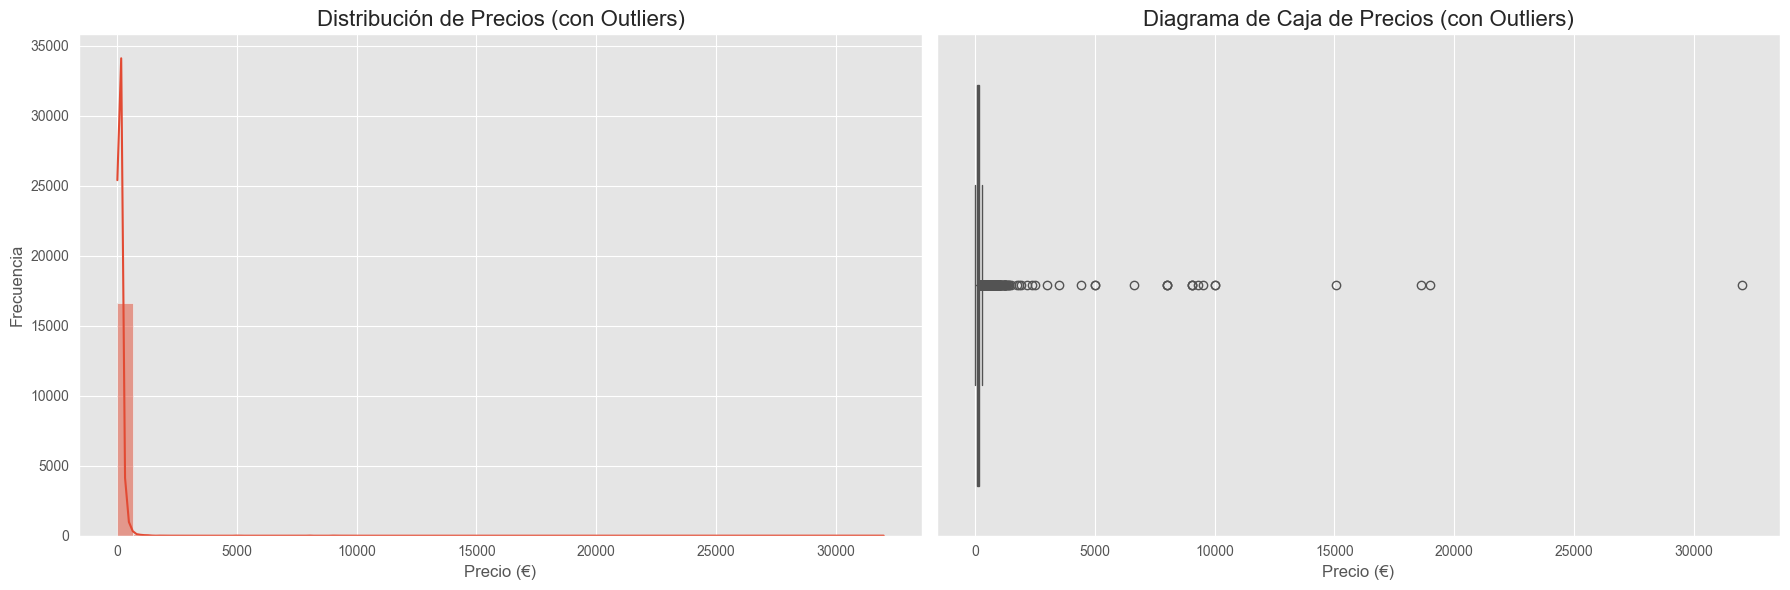

In [57]:
# Creamos una figura de Matplotlib con 2 subplots (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Histograma del precio
sns.histplot(df_madrid['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Precios (con Outliers)', fontsize=16)
axes[0].set_xlabel('Precio (€)')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2: Boxplot del precio
sns.boxplot(x=df_madrid['price'], ax=axes[1])
axes[1].set_title('Diagrama de Caja de Precios (con Outliers)', fontsize=16)
axes[1].set_xlabel('Precio (€)')

# Mostramos los gráficos
plt.tight_layout()
plt.show()

#### 4.2.1. Filtrado de Outliers

Para poder visualizar y analizar el comportamiento del mercado de alquileres típico, filtraremos el dataset para excluir los precios extremadamente altos. Usaremos el cuantil 99 como punto de corte, enfocándonos en el 99% de las propiedades con precios más comunes.

El 99% de los alojamientos tienen un precio por noche de 564.40€ o menos.


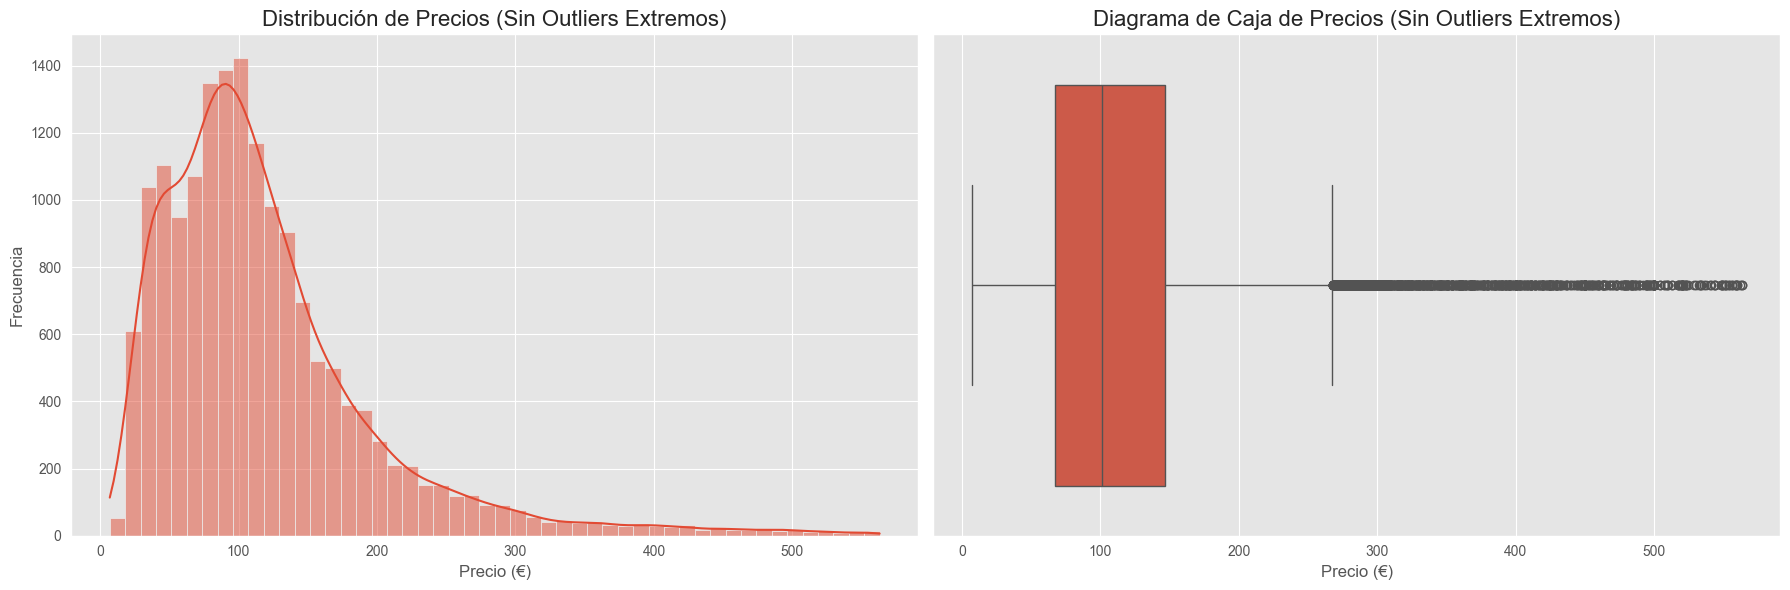

In [58]:
# Calculamos el cuantil 99 del precio
price_cap = df_madrid['price'].quantile(0.99)
print(f"El 99% de los alojamientos tienen un precio por noche de {price_cap:.2f}€ o menos.")

# Creamos un nuevo DataFrame filtrado, que usaremos para la mayoría de las visualizaciones
df_madrid_filtered = df_madrid[df_madrid['price'] <= price_cap]

# --- Volvemos a visualizar, pero ahora con el DataFrame filtrado ---

# Creamos una figura de Matplotlib con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico 1: Histograma del precio filtrado
sns.histplot(df_madrid_filtered['price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribución de Precios (Sin Outliers Extremos)', fontsize=16)
axes[0].set_xlabel('Precio (€)')
axes[0].set_ylabel('Frecuencia')

# Gráfico 2: Boxplot del precio filtrado
sns.boxplot(x=df_madrid_filtered['price'], ax=axes[1])
axes[1].set_title('Diagrama de Caja de Precios (Sin Outliers Extremos)', fontsize=16)
axes[1].set_xlabel('Precio (€)')

# Mostramos los gráficos
plt.tight_layout()
plt.show()

### 4.3. Relación entre Precio, Tipo de Propiedad y Tipo de Habitación

Ahora que entendemos la distribución general del precio, investigaremos cómo varía según las características del alojamiento. Analizaremos cuáles son los tipos de propiedad más comunes y cómo el tipo de habitación (`Entire home/apt`, `Private room`, etc.) impacta en el precio promedio.

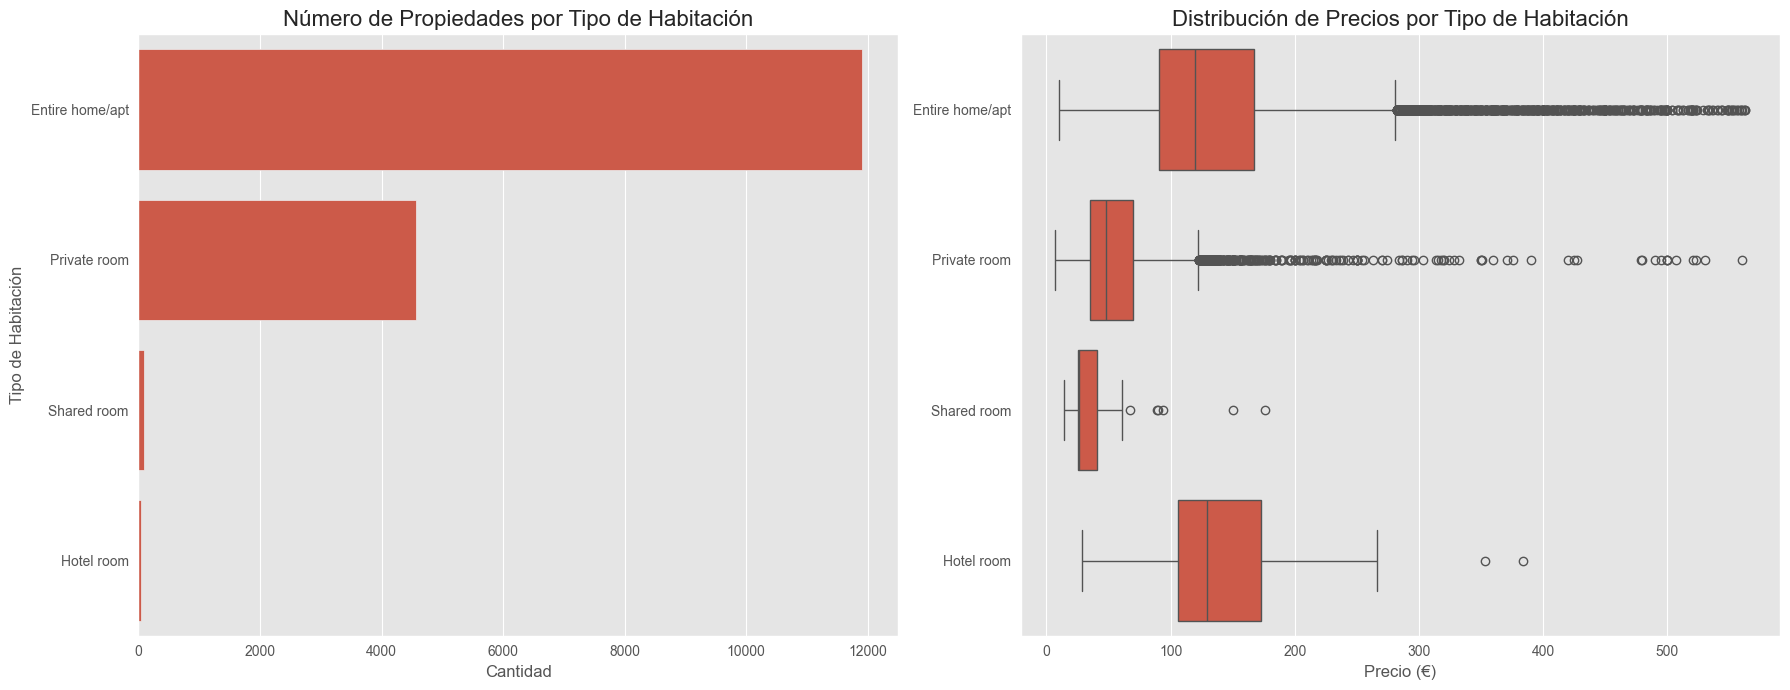

In [59]:
# Creamos una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Gráfico 1: Conteo de propiedades por tipo de habitación
sns.countplot(y=df_madrid_filtered['room_type'], ax=axes[0], order = df_madrid_filtered['room_type'].value_counts().index)
axes[0].set_title('Número de Propiedades por Tipo de Habitación', fontsize=16)
axes[0].set_xlabel('Cantidad')
axes[0].set_ylabel('Tipo de Habitación')

# Gráfico 2: Distribución de precios por tipo de habitación
sns.boxplot(y='room_type', x='price', data=df_madrid_filtered, ax=axes[1], order = df_madrid_filtered['room_type'].value_counts().index)
axes[1].set_title('Distribución de Precios por Tipo de Habitación', fontsize=16)
axes[1].set_xlabel('Precio (€)')
axes[1].set_ylabel('') # Eliminamos la etiqueta Y para no ser redundantes

plt.tight_layout()
plt.show()

#### 4.3.1. Análisis Detallado por Tipo de Propiedad

La variable `property_type` es más granular. Vamos a identificar los 10 tipos de propiedad más comunes y analizar su precio promedio para entender mejor el inventario de Airbnb en Madrid.

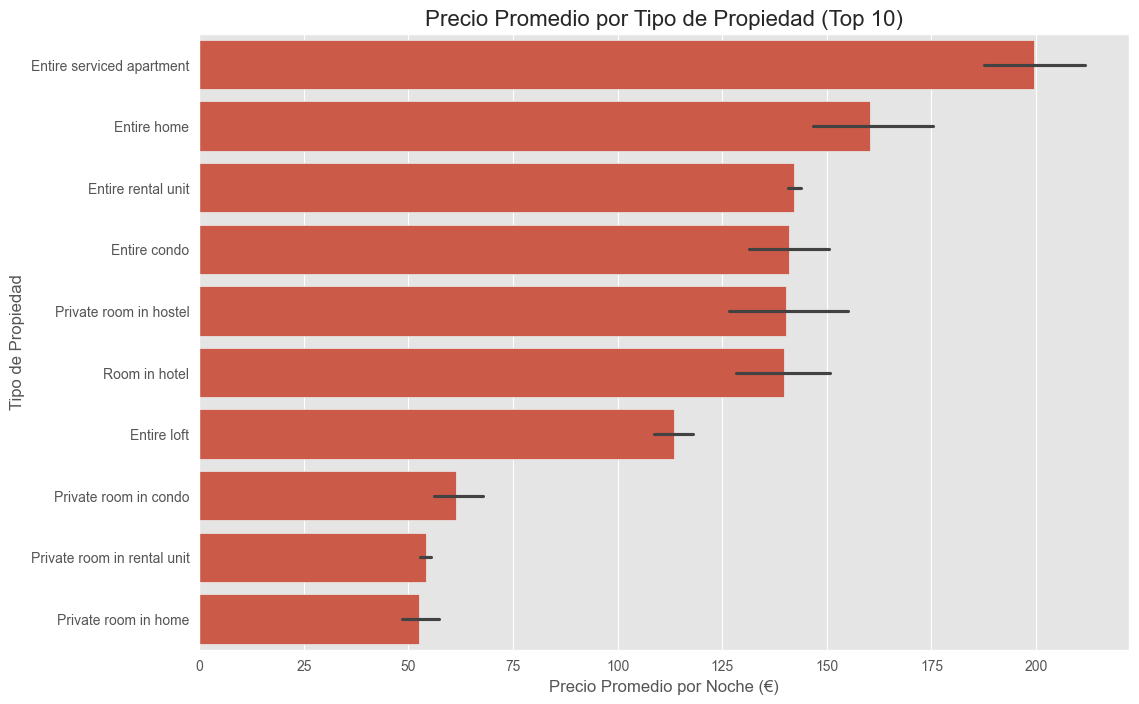

In [60]:
# 1. Identificar los 10 tipos de propiedad más comunes
top_10_properties = df_madrid_filtered['property_type'].value_counts().nlargest(10).index

# 2. Filtrar el DataFrame para incluir solo estas 10 categorías
df_top_10 = df_madrid_filtered[df_madrid_filtered['property_type'].isin(top_10_properties)]

# 3. Calcular el precio promedio para estas categorías y ordenarlas
order_by_price = df_top_10.groupby('property_type')['price'].mean().sort_values(ascending=False).index

# 4. Crear la visualización
plt.figure(figsize=(12, 8))
sns.barplot(
    y='property_type', 
    x='price', 
    data=df_top_10, 
    order=order_by_price
)

plt.title('Precio Promedio por Tipo de Propiedad (Top 10)', fontsize=16)
plt.xlabel('Precio Promedio por Noche (€)')
plt.ylabel('Tipo de Propiedad')
plt.show()

### 4.4. Análisis Geográfico: ¿Dónde están los Airbnb y a qué precio?

La ubicación es, posiblemente, el factor más determinante en el precio de un alojamiento. En esta sección, identificaremos los barrios con mayor número de ofertas y analizaremos cuáles son los más caros y los más asequibles. Culminaremos con un mapa de calor para visualizar la densidad y el precio de los alojamientos en toda la ciudad.

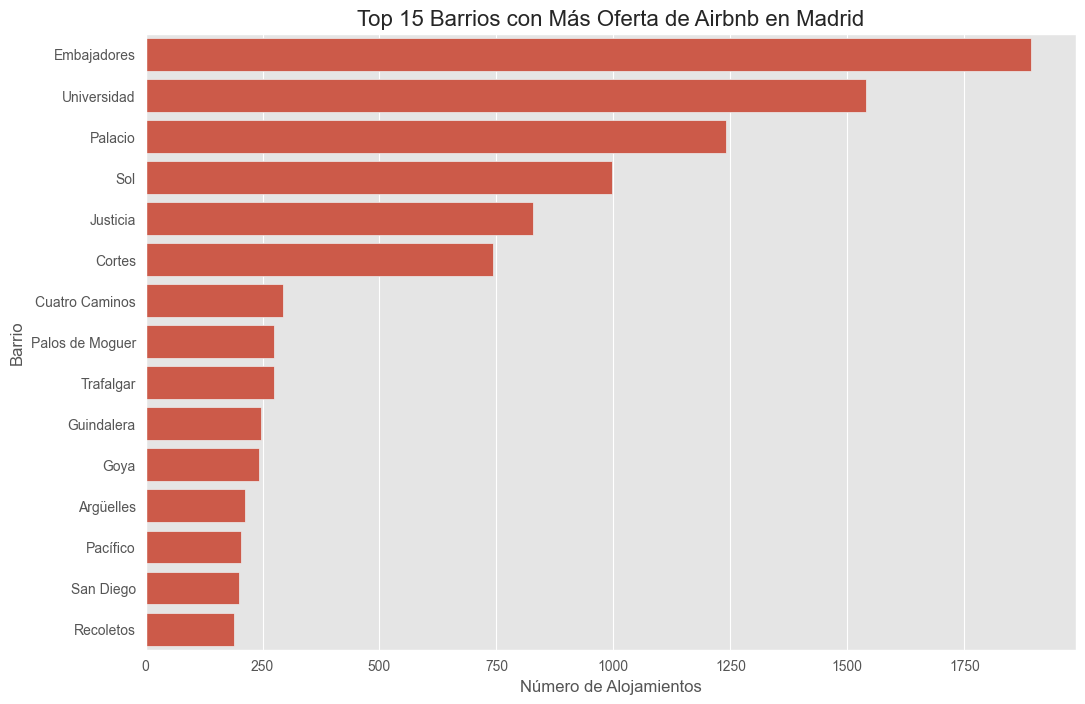

In [61]:
# Contamos el número de alojamientos por barrio y seleccionamos el top 15
top_15_neighbourhoods = df_madrid_filtered['neighbourhood_cleansed'].value_counts().nlargest(15)

# Creamos la visualización
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_15_neighbourhoods.values, 
    y=top_15_neighbourhoods.index
)

plt.title('Top 15 Barrios con Más Oferta de Airbnb en Madrid', fontsize=16)
plt.xlabel('Número de Alojamientos')
plt.ylabel('Barrio')
plt.show()

#### 4.4.1. Precio Promedio por Barrio

No todos los barrios tienen el mismo rango de precios. Un alojamiento en el barrio de Salamanca no cuesta lo mismo que uno en Puente de Vallecas. Analizaremos el precio promedio en los 15 barrios con más oferta.

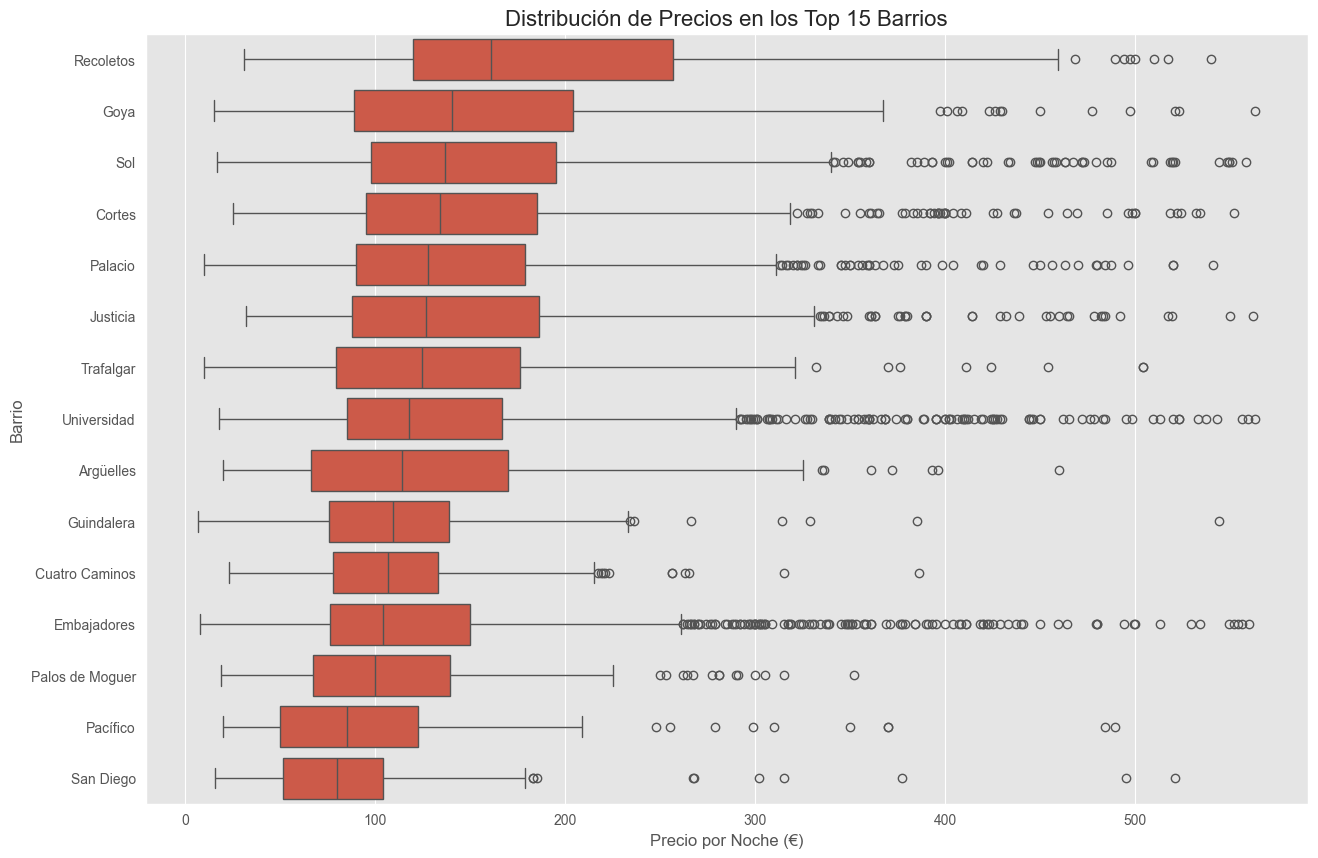

In [62]:
# 1. Obtenemos la lista del top 15 de barrios que ya calculamos
top_15_names = top_15_neighbourhoods.index

# 2. Filtramos el DataFrame para incluir solo los alojamientos de esos barrios
df_top_15_neighbourhoods = df_madrid_filtered[df_madrid_filtered['neighbourhood_cleansed'].isin(top_15_names)]

# 3. Calculamos el orden de los barrios por precio mediano (de más caro a más barato)
price_order = df_top_15_neighbourhoods.groupby('neighbourhood_cleansed')['price'].median().sort_values(ascending=False).index

# 4. Creamos la visualización
plt.figure(figsize=(15, 10))
sns.boxplot(
    y='neighbourhood_cleansed', 
    x='price', 
    data=df_top_15_neighbourhoods, 
    order=price_order
)

plt.title('Distribución de Precios en los Top 15 Barrios', fontsize=16)
plt.xlabel('Precio por Noche (€)')
plt.ylabel('Barrio')
plt.show()

#### 4.4.2. Mapa de Calor de Precios en Madrid

Para obtener una visión holística de la distribución geográfica y de precios, crearemos un mapa de dispersión (scatterplot) utilizando las coordenadas de latitud y longitud. El color de cada punto representará el precio, permitiéndonos identificar visualmente las "zonas calientes" de la ciudad.

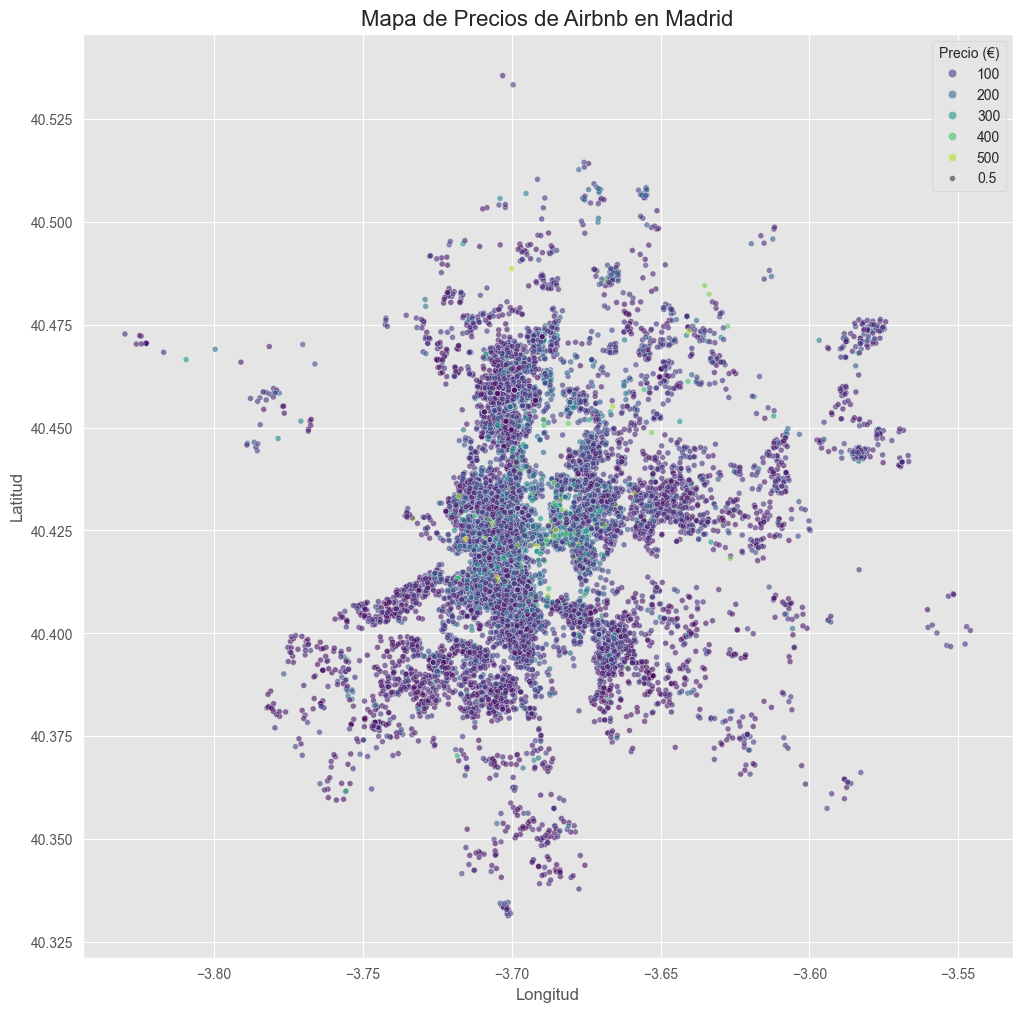

In [63]:
plt.figure(figsize=(12, 12))

sns.scatterplot(
    x='longitude', 
    y='latitude', 
    hue='price', 
    palette='viridis',  # Una paleta de colores que va bien de claro (barato) a oscuro (caro)
    data=df_madrid_filtered,
    size=0.5,           # Hacemos los puntos más pequeños para evitar la sobreposición
    alpha=0.6,          # Añadimos transparencia
    legend=True
)

plt.title('Mapa de Precios de Airbnb en Madrid', fontsize=16)
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Precio (€)')
plt.show()

### 4.5. Análisis de Anfitriones: El Efecto "Superhost"

La insignia "Superhost" de Airbnb se otorga a los anfitriones mejor valorados y con más experiencia. Investigaremos si existe una diferencia tangible en el precio y en las calificaciones de las propiedades gestionadas por Superhosts en comparación con los anfitriones estándar.

In [ ]:
# Creamos una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Mapeamos 't' y 'f' a etiquetas más claras para los gráficos
df_madrid_filtered['superhost_label'] = df_madrid_filtered['host_is_superhost'].map({'t': 'Superhost', 'f': 'Anfitrión Normal'})

# Gráfico 1: Comparación de precios
sns.boxplot(x='superhost_label', y='price', data=df_madrid_filtered, ax=axes[0])
axes[0].set_title('Precio por Noche: Superhost vs. Anfitrión Normal', fontsize=16)
axes[0].set_xlabel('Tipo de Anfitrión')
axes[0].set_ylabel('Precio (€)')

# Gráfico 2: Comparación de puntuaciones de valoración
sns.boxplot(x='superhost_label', y='review_scores_rating', data=df_madrid_filtered, ax=axes[1])
axes[1].set_title('Puntuación General: Superhost vs. Anfitrión Normal', fontsize=16)
axes[1].set_xlabel('Tipo de Anfitrión')
axes[1].set_ylabel('Puntuación (sobre 5)')

plt.tight_layout()
plt.show()

# Limpiamos la columna auxiliar que creamos
df_madrid_filtered.drop('superhost_label', axis=1, inplace=True)

### 4.6. Matriz de Correlación

Para finalizar nuestro análisis exploratorio, generaremos un mapa de calor de correlaciones. Esto nos permitirá identificar de forma rápida y visual las relaciones lineales entre las variables numéricas de nuestro dataset, como la relación entre el número de habitaciones y el precio, o entre las diferentes métricas de valoración.

In [ ]:
# Seleccionamos solo las columnas numéricas que tienen sentido para la correlación
numeric_cols = [
    'accommodates', 'bedrooms', 'beds', 'price', 
    'number_of_reviews', 'review_scores_rating', 'review_scores_cleanliness', 
    'review_scores_location', 'review_scores_value'
]

# Calculamos la matriz de correlación
correlation_matrix = df_madrid_filtered[numeric_cols].corr()

# Creamos el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True,         # Muestra los valores numéricos en cada celda
    cmap='coolwarm',    # Una paleta de colores donde el rojo es positivo y el azul es negativo
    fmt=".2f",          # Formatea los números a dos decimales
    linewidths=.5
)

plt.title('Mapa de Calor de Correlaciones', fontsize=16)
plt.show()

# 5. Conclusiones del Análisis Exploratorio

Tras un exhaustivo proceso de limpieza y análisis de los datos de Airbnb en Madrid, hemos extraído los siguientes insights clave:

*   **Dominio del Mercado:** El mercado está fuertemente dominado por apartamentos/casas enteras (`Entire home/apt`), que constituyen la mayoría de la oferta y, lógicamente, presentan los precios más elevados en comparación con las habitaciones privadas o compartidas.
*   **Concentración Geográfica y de Precios:** La oferta y los precios más altos se concentran de manera abrumadora en el distrito **Centro**, seguido por otros barrios de la "almendra central" como **Salamanca** y **Chamberí**. Existe una clara correlación negativa entre la distancia al centro y el precio.
*   **Perfil del Alojamiento Típico:** Un alojamiento típico en Madrid tiene capacidad para 2-3 personas, cuenta con 1 habitación y su precio mediano se sitúa en torno a los 102€. Sin embargo, la distribución de precios está sesgada, con una cola larga de propiedades de lujo que elevan el precio promedio.
*   **El Valor de ser Superhost:** Los "Superhosts" no solo obtienen calificaciones significativamente más altas y consistentes, sino que también tienden a fijar precios ligeramente superiores, lo que sugiere que la insignia es un indicador de calidad que el mercado recompensa.
*   **Factores Clave del Precio:** El análisis de correlación confirma que las características físicas del alojamiento (capacidad, número de habitaciones) son los predictores más fuertes del precio. Las puntuaciones de valoración, aunque importantes para la calidad, no muestran una correlación directa y fuerte con el precio en el rango analizado.

**Siguientes Pasos:**
Este análisis exploratorio sienta las bases para futuras investigaciones. Los siguientes pasos podrían incluir:
1.  **Modelo de Machine Learning:** Construir un modelo predictivo para estimar el precio de un alquiler basándose en sus características.
2.  **Análisis de Amenities:** Investigar qué servicios específicos (ej. piscina, parking, aire acondicionado) tienen un mayor impacto en el precio.
3.  **Dashboard Interactivo:** Desarrollar un dashboard que permita a los usuarios explorar los datos de forma dinámica, filtrando por barrio, tipo de propiedad y precio.